In [24]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
with open('outputs/output SVC.json') as file:
     measurements = json.load(file)['measurements']

In [26]:
groupedBySampler = {}
for entry in measurements:
    temp = groupedBySampler.get(entry['sampler'],[])
    if 'reason' in entry.keys():
        continue
    temp.append(entry)
    groupedBySampler[entry['sampler']] = temp

In [28]:
sampler_auc={}
for sampler in groupedBySampler:
    temp = []
    for entry in groupedBySampler[sampler]:
        temp.append(entry['auc_mean'])
    sampler_auc[sampler] = temp
sampler_auc

{'str': [85.30853658536586,
  84.93761821801891,
  80.04657789945246,
  71.54839472374316,
  78.52537332005973,
  78.2697237431558],
 'RandomOverSampler': [84.73918616226979,
  85.39835739173718,
  80.32857142857142,
  80.39324290691887,
  83.21223245395718,
  82.79225983076157],
 'RandomUnderSampler': [83.9927949228472,
  83.75297411647585,
  80.71632653061226,
  84.39019412643106,
  81.58010204081633,
  85.0034718765555]}

In [33]:
df = pd.DataFrame.from_dict(sampler_auc)
df.describe()

,str,RandomOverSampler,RandomUnderSampler
count,6.000000,6.000000,6.000000
mean,79.772704,82.810642,83.239311
std,5.076433,2.125166,1.696279
min,71.548395,80.328571,80.716327
25%,78.333636,80.992997,82.123320
50%,79.285976,83.002246,83.872885
75%,83.714858,84.357448,84.290844
max,85.308537,85.398357,85.003472


<AxesSubplot:>

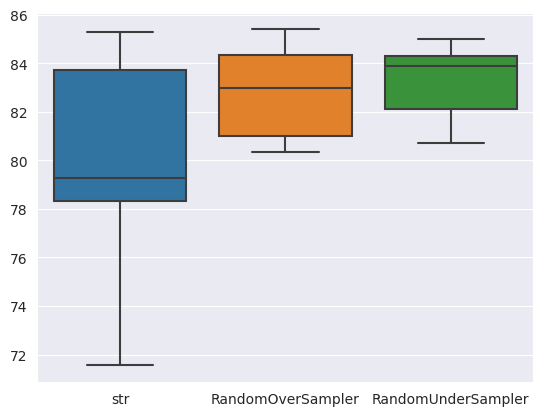

In [32]:
sns.boxplot(data=df)

In [30]:
for key, val in groupedByImputer.items():
    print(key)
    display(pd.Series([entry['Execution time in seconds'] for entry in val]).describe())

SimpleImputer


KeyError: 'Execution time in seconds'

In [ ]:
temp = []
for entry in measurements:
    temp.append([entry['imputer'], entry["scaler"], entry["estimator"], entry['auc mean'], entry['best_params']['drop_columns__minimum_percentage_to_be_dropped'], entry['Execution time in seconds']])
df = pd.DataFrame(temp, columns=['imputer', 'scaler', 'estimator', 'AUC mean', 'minimumPercentageMissingToBeDropped','Execution time in seconds'])
df['Execution time in Minutes'] = df['Execution time in seconds'] / 60
df.sort_values(by='AUC mean', ascending=False)